In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

In [38]:
np.random.seed(2018)

n = 40
maxdegree = 14
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [39]:
train_mse = np.zeros(maxdegree)
test_mse = np.zeros(maxdegree)
poly_degree = np.zeros(maxdegree)

# Divide in test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
for degree in range(maxdegree):
    
    # Fitting of the model
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
    clf = model.fit(x_train_scaled, y_train)

    # Prediction
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled)
    poly_degree[degree] = degree

    # Computation of the MSE for train and test data
    test_mse[degree] = np.mean((y_test-y_pred)**2)
    train_mse[degree] = np.mean((y_train-y_fit)**2)

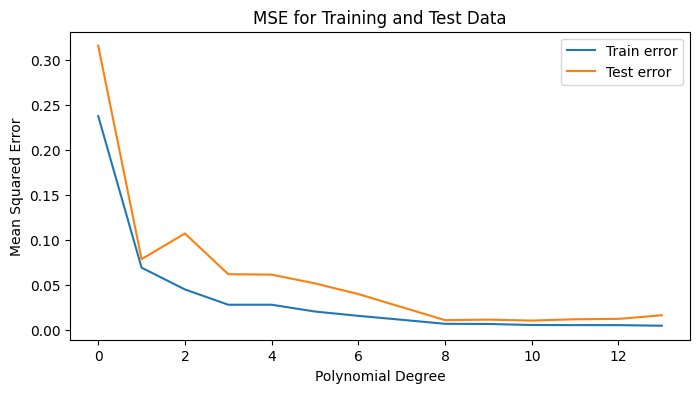

In [41]:
# Plotting MSE for training and test data
plt.figure(figsize=(8, 4))
plt.plot(poly_degree, train_mse, label='Train error')
plt.plot(poly_degree, test_mse, label='Test error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Training and Test Data')
plt.legend()
plt.show()

**Bias-Variance tradeoff**

In [42]:
n_boostraps = 100

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.0796891867672603
Var: 0.004579219539673833
0.08426840630693411 >= 0.0796891867672603 + 0.004579219539673833 = 0.08426840630693413
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548984
Var: 0.0032153180657605116
0.10398646080125035 >= 0.10077114273548984 + 0.0032153180657605116 = 0.10398646080125036
Polynomial degree: 3
Error: 0.06547790180152352
Bias^2: 0.06208238634231947
Var: 0.0033955154592040914
0.06547790180152352 >= 0.06208238634231947 + 0.0033955154592040914 = 0.06547790180152356
Polynomial degree: 4
Error: 0.06844519414009438
Bias^2: 0.06453579006728316
Var: 0.003909404072811224
0.06844519414009438 >= 0.06453579006728316 + 0.003909404072811224 = 0.06844519414009438
Polynomial degree: 5
Error: 0.05227921801205698
Bias^

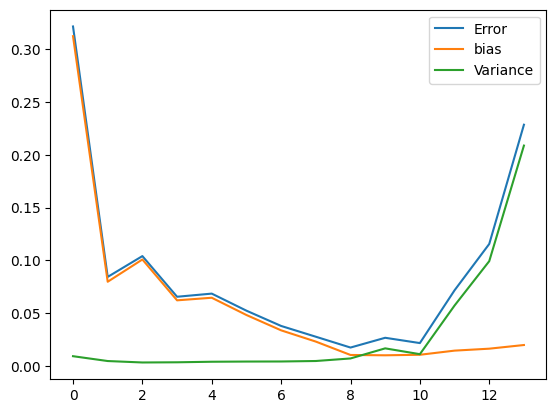

In [43]:
for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    poly_degree[degree] = degree
    error[degree] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))
    bias[degree] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
    variance[degree] = np.mean(np.var(y_pred, axis=1, keepdims=True))
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(poly_degree, error, label='Error')
plt.plot(poly_degree, bias, label='bias')
plt.plot(poly_degree, variance, label='Variance')
plt.legend()
plt.show()